# Recitation 11 - ODE's and Error Propagation

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.integrate import odeint

## Numerical Integration

### Rearranging ODE's

Convert the following ODEs into standard form. If it is a second-order, make sure you specify both dimensions.

 1. $\frac{dx}{dt} - t = 2$
 
 2. $\frac{dx}{dt} = -rx$
 
 3. $\frac{d^2x}{dt^2} + k x = \sin t$
 
 4. $\frac{d^2x}{dt^2} + b \frac{dx}{dt} + k x = 0$

1. $\frac{dx}{dt} = t+2$
 
2. $\frac{dx}{dt} = -rx$

3. $\frac{dx_0}{dt}=x_0$ <br>
$\frac{dx_1}{dt}=sin(t)-k_0$
#if second derivative need two equations to specifiy it x_1= dx/xt  dx_1/ dt= second derivative
 
4. $\frac{d^2x}{dt^2} + b \frac{dx}{dt} + k x = 0$

5$\frac{dx_0}{dt}=x_0$ <br>
$\frac{dx_1}{dt}=-bx_1-kx_0$


In [11]:
d

NameError: name 'd' is not defined

### Example: Tank

For a tank:

$$\frac{dV}{dt} + k_1 \sqrt{V} = k_2$$

and use $k_1 = 1$, $k_2 = 4$. Plot the solution from $t=0$ to $t=25$ with the initial condition that $V_0 = 10$.

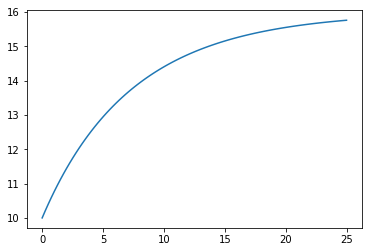

In [16]:
from scipy.integrate import odeint#  first th depedent variable then idependent
def tank (V,t): 
    return k2-k1*np.sqrt(V)
k1=1
k2=4
V0=10
t=np.linspace(0,25,100)
Vodeint= odeint(tank,V0,t)
plt.plot(t,Vodeint)
plt.show()#plot of volume over time

### Example: Heat Fin

An energy balance for an isotropic fin with constant shape and cross-sectional area made of a material whose properties do not change with temperature gives

$$\frac{d^2T}{dx^2} - m^2(T - T_\infty) = 0$$

where

$$m = \sqrt{\frac{hP}{kA}}$$

Solve for the temperature at the end of the fin for a cylindrical fin with a **1/2 in. diameter**, a **length of 6 in.**, a **k (thermal conductivity) of 5.82 W/in. K**, an **h (convective heat transfer coefficient) of 0.0354 W/in.^2 K**, and a **bulk temperature of ($T_\infty$) 300K**. The initial conditions are

$$T(0) = 373 K$$

$$\left. \frac{dT}{dx}\right |_{x = 0} = -17.8 K/in.$$

$$T_1=\frac{dT_0}{dx}$$
$$\frac{dT_1}{dx}=m^2(T_0-T_\infty)$$

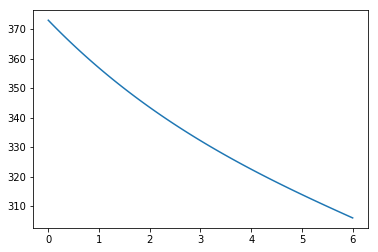

In [22]:
def fin(T,x):
    T0=T[0]
    T1=T[1]
    m=np.sqrt(h*P/(k*A)) #perimeter -P and area = A
    return T1,m**2*(T0-Tb)
d=0.5
L=6
k=5.82
h=0.0354
Tb=300
T0=373
dTdx0=-17.8
P=np.pi*d
A=np.pi*d**2/4
xfin=np.linspace(0,L,100)
Todeint=odeint(fin,[T0,dTdx0],xfin)
T=Todeint[:,0] #first column
dTdx=Todeint[:,1] #first column
#plt.plot(xfin,Todeint)
plt.plot(xfin,T)
plt.show()
print('Temperature at the end of the fin is {:.3} k'.format(T[-1]))

## Error Propagation

$$\frac{\Delta y}{\Delta x} \approx \left. \frac{dy}{dx}\right |_{x = \hat x}$$

$$\Delta y = \left. \frac{dy}{dx}\right |_{x = \hat x} \Delta x$$ 

https://nbviewer.jupyter.org/github/whitead/numerical_stats/blob/master/unit_13/lectures/lecture_2.ipynb

1. You are measuring the volume (in cm^3) of various samples of mass 1kg. The data is listed below as V. What is the error in density?

2. You are measuring the heights, widths, and lengths (in cm) of various boxes that are (supposed to) have the same volume. The data is listed below as h, l, and w. What is the error in volume?

In [24]:
np.random.seed(1234)

V = ss.norm.rvs(loc = 10, scale = 1, size = 10)
h = ss.norm.rvs(loc = 2, scale = 0.25, size = 10)
l = ss.norm.rvs(loc = 4, scale = 1, size = 10)
w = ss.norm.rvs(loc = 3, scale = 0.5, size = 10)

$$\Delta=\rho -\frac{m}{\hat V^2}\Delta V$$

In [31]:
Vmean=np.mean(V)
Vstd=np.std(V,ddof=1) #t distribution so that is the std
m=1 #just said 
#t because have 10 points
t=ss.t.ppf(0.975,df=len(V)-1)
DV=t*Vstd/np.sqrt(len(V))
Drho=-m/Vmean**2*(DV)
print('{:.3} +/-b{:.3}'.format(m/Vmean,abs(Drho)))

0.101 +/-b0.00816


$$\Delta V= \sqrt{(\hat w \hat h \Delta l)^2 +(\hat l \hat h \Delta w)^2 + (\hat l \hat w \Delta h )^2}$$

In [40]:
lmean=np.mean(l)
wmean=np.mean(w)
hmean=np.mean(h)
lstd=np.std(l,ddof=1)
wstd=np.std(w,ddof=1)
hstd=np.std(h,ddof=1)
t=ss.t.ppf(0.975,df=len(l)-1)
Dl=t*lstd/np.sqrt(len(l))
Dw=t*wstd/np.sqrt(len(w))
Dh=t*hstd/np.sqrt(len(h))
DV=np.sqrt((wmean*hmean*Dl)**2+(lmean*hmean*Dw)**2 + (lmean*wmean*Dh)**2)
print('{:.3}+ +/- {:.3}'.format(lmean*wmean*hmean,DV)) #erros is larger than the individuals

27.0+ +/- 5.74


## Challenge: Particle in a Box

The particle in a box is a classic physics thought experiment about a particle trapped in a one-dimensional box (although it can be extended to multiple dimensions). The probability of finding the particle at an x value is given by

$$\frac{d^2\psi}{dx^2} = -k^2\psi$$

$$k = (\frac{8 \pi^2 m E}{h^2})^{1/2}$$

$$h = 6.626\times10^{-34} J s$$

where m is the mass of the particle, E is the energy of the particle, and h is Planck's constant. The boundary conditions are

$$\psi(0) = 0$$

$$\psi(L) = 0$$

Find the energy(ies) of the particle which satisfy this system.